# **Gradiente descendente**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Derivada numérica

A fórmula da derivada possui o formato

$$f'(x) = \lim_{ϵ → 0} \frac{f(x+ ϵ) - f(x)}{ϵ} + \frac{Θ(ϵ)}{ϵ}$$

onde $\lim_{ϵ → 0} \frac{Θ(ϵ)}{ϵ} = 0$.

Porém não podemos fazer literalmente $ϵ → 0$ em um computador, mas podemos escolher um $ϵ$ proximo de $0$ de modo que o erro se aproxime bem de $0$.

Com uma pequena reformulação da equação acima encontramos a derivada numérica que pode ser calculada em um computador.

$$f_N'(x) = \lim_{ϵ → 0} \frac{f(x+ ϵ) - f(x- ϵ)}{2ϵ}$$

In [ ]:
def derivada(f, ponto, epslon):
  return (f(ponto + epslon) - f(ponto - epslon)) / (2*epslon)

Para fim de exemplo sejam as funções

$$f_1 = x^2$$
$$f_2 = x^2 + x + 9$$
$$f_3 = x^2 + 10 \sin(x)$$

os pontos $-50$, $2$ e $0$ e o $ϵ = 0.001$.

In [ ]:
def f1(x):
  return x**2

def f2(x):
  return x**2 + x + 9

def f3(x):
  return (x**2)+10*np.sin(x)

print(derivada(f1, ponto = -50, epslon = 0.001),
      derivada(f2, ponto = 2, epslon = 0.001),
      derivada(f3, ponto = 0, epslon = 0.001))

-99.99999999968168 4.999999999999893 9.999998333333416


## Gradiente descendente com derivada numérica

Gradiente descendente é usado quando queremos otimizar (maximizar ou minimizar) uma função. O gradiente de uma função num ponto é um vetor direcionado para onde a função cresce mais rápido. O gradiente descendente é uma sequência de pontos onde se soma (maximização) ou subtrai (minimização) o gradiente multiplicado por uma parâmetro.

$$ 
x_{n+1} = x_n +  \beta \nabla f(x_n)
$$

Essa técnica não funciona sempre. Caso o problema de maximização (minimização) não seja em uma função côncava (convéxa) então o ponto achado pode não ser o procurado. Outra possibilidade é que o método entre em loop por não existir o ponto de máimo ou mínimo, ou por causa da escolha de um parâmetro $\beta$ muito grande o gradiente descendente ficará "rondando" o ponto mas nunca chegará.

No código usaremos o $\beta = \frac{0.1}{1 + (n-1)0.1}$ para o "passo" fique cada vez menor.

In [ ]:
def gradienteDes(f, x):
  n = 1
  alfa = 0.1
  while abs(derivada(f, x, 0.01)) > 0.1:
    x = x - (alfa/n)*derivada(f, x, 0.001)
    n = n + 0.1
  
  return x

Aqui fizemos uma função que faz o processo e salva os passos para construir o gráfico final.

In [ ]:
class GraD:

  def GradD(funcao, inicial):

    n = 0
    ponto = [inicial]

    while abs(derivada(funcao, ponto[n], 0.01)) > 0.1:
      ponto.append(ponto[n] - (0.1)*derivada(funcao, ponto[n], 0.001))
      n = n + 1
    
    return ponto

Aqui vemos 3 exemplos usando as funções dadas anteriormente. Note que a função 3 não encontra o ponto de mínimo.

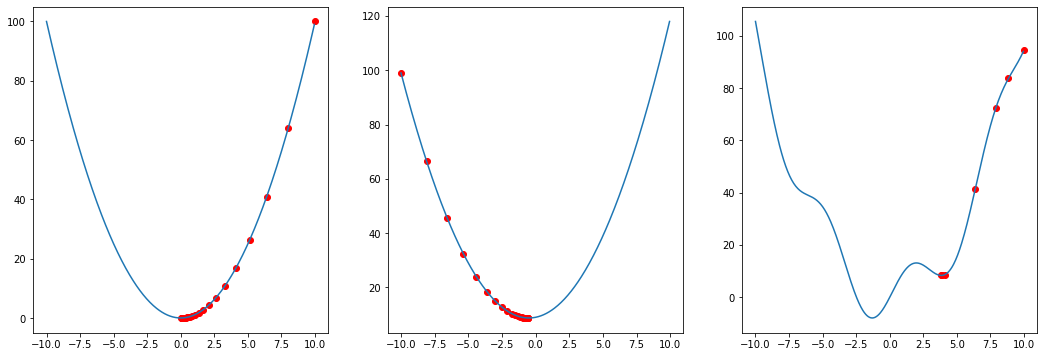

In [ ]:
x = np.arange(-10, 10, 0.05)

xs1 = GraD.GradD(f1, 10)
fxs1 = f1(np.array(xs1))

xs2 = GraD.GradD(f2, -10)
fxs2 = f2(np.array(xs2))

xs3 = GraD.GradD(f3, 10)
fxs3 = f3(np.array(xs3))

plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(x, f1(x))
plt.scatter(xs1, fxs1, color = "red")
plt.subplot(132)
plt.plot(x, f2(x))
plt.scatter(xs2, fxs2, color = "red")
plt.subplot(133)
plt.plot(x, f3(x))
plt.scatter(xs3, fxs3, color = "red")